## Import the libraries

In [2]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

## Read the test and training data
NR | Filename | Classes | Features | Enteries (per class)| Size (Total) |
|---|---|---|---|---|---|
|1| data_og_best_5hz-100 | 5 | (8) RMS + WL (N=100) | 100  | 500 |
|2| data_og_best_5hz-50-after10 | 5 | (8) RMS + WL (N=100) | 50  | 250 |
|3| data_og_best_5hz-50-after20 | 5 | (8) RMS + WL (N=100) | 50  | 250 |
|4| data_og_best_5hz-50-after25 | 5 | (8) RMS + WL (N=100) | 50  | 250 |


In [216]:
# Select the training data
data_train = pd.read_csv("./data/test/data_og_best_5hz-100.csv")
# data_train = pd.read_csv("./data/new/data_5hz-50-2.csv")
#data_train = pd.read_csv("./data/new/data_10hz-100.csv")
#data_train = pd.read_csv("./data/new/data_10hz-100-2.csv")

# Select the testing data
#data_test = pd.read_csv("./data/test/data_og_best_5hz-50-after10.csv")
#data_test = pd.read_csv("./data/test/data_og_best_5hz-50-after20.csv")
#data_test = pd.read_csv("./data/test/data_og_best_5hz-50-after25.csv")
data_test = pd.read_csv("./data/test/data_og_best_5hz-50-after160.csv")

X = data_train.drop("res", axis=1)
y = data_train["res"] 

xx = data_test.drop("res", axis=1)
yy = data_test["res"] 



In [217]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=11221)


## Configure the models using the parameter found using grid search.

In [218]:
clf = svm.SVC(kernel='rbf', decision_function_shape='ovo', C=100, probability=True) 

In [219]:
clf.fit(X_train, y_train)

SVC(C=100, decision_function_shape='ovo', probability=True)

In [220]:
pred_svc_y_train = clf.predict(X_test)
pred_svc_y_test = clf.predict(xx)

   SVC Training  SVC Testing
0          0.98        0.856


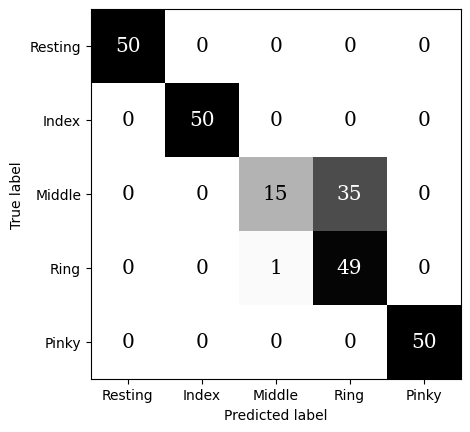

In [221]:

acc_svc_train = accuracy_score(y_test, pred_svc_y_train)
acc_svc_test = accuracy_score(yy, pred_svc_y_test)


accuracies = [[acc_svc_train,acc_svc_test],]
lst = pd.DataFrame(accuracies, columns=["SVC Training", "SVC Testing"])
print(lst)

labels = ["Resting", "Index", "Middle", "Ring", "Pinky"]
conf_mat = confusion_matrix(yy, pred_svc_y_test)
conf = ConfusionMatrixDisplay(conf_mat, display_labels=labels)
conf.plot(cmap='gist_yarg', colorbar=False, text_kw={'size':'x-large', 'fontfamily': 'serif'})


plt.show()


# Plotting real world accuracy 


In [4]:
# Calculate the change frequency in the dataset.
def calculate_change(data):
  changes = 0
  last = None
  for i in data:
     if i != last:
      changes += 1
      last = i
  return changes

Prediction accuracy:  0.9038461538461539
Trigger accuracy:  0.7335164835164835
Gesture changes:  40
Prediction changes:  78
Trigger changes:  44


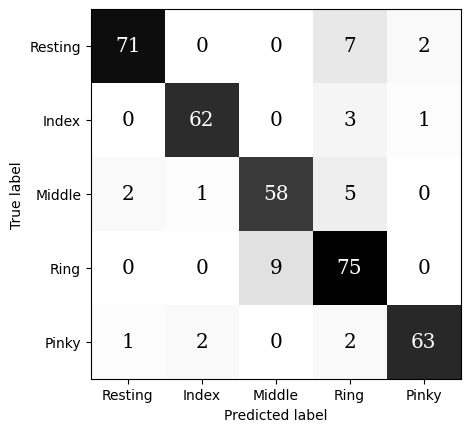

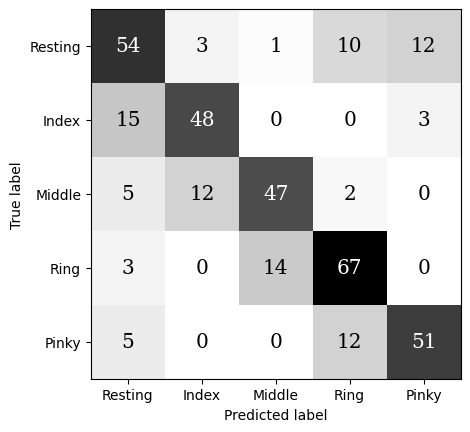

In [11]:
data = pd.read_csv("./data/test/trigger-tests.csv")

real = data["real"]
trigger = data["trigger"]
prediction = data["prediction"]

print("Prediction accuracy: " , accuracy_score(real, prediction))
print("Trigger accuracy: " , accuracy_score(real, trigger))

print("Gesture changes: ", calculate_change(real))
print("Prediction changes: ", calculate_change(prediction))
print("Trigger changes: ", calculate_change(trigger))

labels = ["Resting", "Index", "Middle", "Ring", "Pinky"]
conf_mat = confusion_matrix(real, prediction)
conf = ConfusionMatrixDisplay(conf_mat, display_labels=labels)
conf.plot(cmap='gist_yarg', colorbar=False, text_kw={'size':'x-large', 'fontfamily': 'serif'})


plt.show()

conf_mat = confusion_matrix(real, trigger)
conf = ConfusionMatrixDisplay(conf_mat, display_labels=labels)
conf.plot(cmap='gist_yarg', colorbar=False, text_kw={'size':'x-large', 'fontfamily': 'serif'})


plt.show()